In [50]:
import numpy as np
import h5py, os
import pandas as pd

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
plt.rcParams["font.family"] = "serif"
plt.style.use('classic')
font = font_manager.FontProperties(family='serif', size=16)

import torch
import torch.nn as nn
from torch.utils.data import DataLoader 

In [41]:
def load_and_standardize_data(file, expected_columns=78):
    """
    Load data from a file, filter rows with the expected number of columns, 
    and standardize the features.
    
    Parameters:
    file (str): The path to the data file.
    expected_columns (int): The expected number of columns in the dataset.
    
    Returns:
    numpy array: The standardized features.
    """
    data = []
    with open(file, 'r') as f:
        for line in f:
            split_line = line.strip().split(',')
            if len(split_line) == expected_columns:
                data.append(split_line)
    
    data = np.array(data, dtype=float)
    
    # Standardize the features
    mean = np.mean(data, axis=0)
    std = np.std(data, axis=0)
    standardized_data = (data - mean) / std
    
    return standardized_data

# Usage Example
data_file = '/Users/amanda/Desktop/PhD/Papers/sn_vae_anomaly/features_batch.csv'
standardized_features = load_and_standardize_data(data_file)

In [46]:
# List of feature names
feature_names = [
    'anderson_darling_normal',
    'inter_percentile_range_5',
    'chi2',
    'stetson_K',
    'weighted_mean',
    'duration',
    'otsu_mean_diff',
    'otsu_std_lower',
    'otsu_std_upper',
    'otsu_lower_to_all_ratio',
    'linear_fit_slope',
    'linear_fit_slope_sigma',
    'linear_fit_reduced_chi2'
]

# List of bands
bands = ['u', 'g', 'r', 'i', 'z', 'y']

# Generate the labels
labels = [f"{band}_{feature}" for band in bands for feature in feature_names]

# Print the labels
for label in labels:
    print(label)

u_anderson_darling_normal
u_inter_percentile_range_5
u_chi2
u_stetson_K
u_weighted_mean
u_duration
u_otsu_mean_diff
u_otsu_std_lower
u_otsu_std_upper
u_otsu_lower_to_all_ratio
u_linear_fit_slope
u_linear_fit_slope_sigma
u_linear_fit_reduced_chi2
g_anderson_darling_normal
g_inter_percentile_range_5
g_chi2
g_stetson_K
g_weighted_mean
g_duration
g_otsu_mean_diff
g_otsu_std_lower
g_otsu_std_upper
g_otsu_lower_to_all_ratio
g_linear_fit_slope
g_linear_fit_slope_sigma
g_linear_fit_reduced_chi2
r_anderson_darling_normal
r_inter_percentile_range_5
r_chi2
r_stetson_K
r_weighted_mean
r_duration
r_otsu_mean_diff
r_otsu_std_lower
r_otsu_std_upper
r_otsu_lower_to_all_ratio
r_linear_fit_slope
r_linear_fit_slope_sigma
r_linear_fit_reduced_chi2
i_anderson_darling_normal
i_inter_percentile_range_5
i_chi2
i_stetson_K
i_weighted_mean
i_duration
i_otsu_mean_diff
i_otsu_std_lower
i_otsu_std_upper
i_otsu_lower_to_all_ratio
i_linear_fit_slope
i_linear_fit_slope_sigma
i_linear_fit_reduced_chi2
z_anderson_darli

In [47]:
df = pd.DataFrame(standardized_features, columns=labels)

In [48]:
df.describe()

,u_anderson_darling_normal,u_inter_percentile_range_5,u_chi2,u_stetson_K,u_weighted_mean,u_duration,u_otsu_mean_diff,u_otsu_std_lower,u_otsu_std_upper,u_otsu_lower_to_all_ratio,...,y_stetson_K,y_weighted_mean,y_duration,y_otsu_mean_diff,y_otsu_std_lower,y_otsu_std_upper,y_otsu_lower_to_all_ratio,y_linear_fit_slope,y_linear_fit_slope_sigma,y_linear_fit_reduced_chi2
count,3.459970e+05,3.459970e+05,3.459970e+05,3.459970e+05,3.459970e+05,3.459970e+05,3.459970e+05,3.459970e+05,3.459970e+05,3.459970e+05,...,3.459970e+05,3.459970e+05,3.459970e+05,3.459970e+05,3.459970e+05,3.459970e+05,3.459970e+05,3.459970e+05,3.459970e+05,3.459970e+05
mean,-2.264721e-16,7.005684e-16,-8.755359e-16,-1.541478e-15,-5.278803e-17,-9.353158e-14,9.418880e-17,-4.066147e-17,2.251783e-17,2.860485e-14,...,3.170880e-13,-3.148183e-17,-7.435771e-13,-3.810678e-16,1.645260e-15,9.506569e-16,1.469730e-13,-1.314310e-17,2.292952e-14,5.033253e-15
std,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,...,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00
min,-5.481811e+01,-1.702124e-02,-1.811617e+01,-3.394903e+02,-2.753834e+02,-5.866262e+00,-5.030426e-02,-1.117404e-01,-1.241001e-01,-3.386536e+02,...,-8.625389e+00,-2.443919e+02,-5.619415e+00,-2.067825e-01,-2.423196e-01,-2.006926e-01,-2.785181e+00,-1.890762e+02,-5.854747e-01,-1.562245e-01
25%,2.984565e-03,-1.652560e-02,-1.527954e-01,-8.776056e-03,2.183913e-03,-7.119440e-01,-1.733319e-02,-1.460559e-02,-1.593654e-02,-4.966581e-02,...,-3.838202e-01,7.999216e-03,-8.660531e-01,-1.810506e-01,-1.800962e-01,-1.550698e-01,-6.558986e-01,-3.254236e-02,-3.071905e-01,-1.541995e-01
50%,9.789848e-03,-1.637895e-02,-1.473393e-01,6.657222e-03,3.071599e-03,-1.195058e-01,-1.717741e-02,-1.443737e-02,-1.574189e-02,2.459179e-03,...,1.441687e-01,2.380091e-02,-5.350189e-01,-1.735021e-01,-1.660412e-01,-1.434179e-01,1.105565e-02,2.288332e-03,-1.851792e-01,-1.535249e-01
75%,2.149133e-02,-1.606514e-02,-1.385935e-01,1.978645e-02,4.024856e-03,1.074879e+00,-1.677090e-02,-1.415800e-02,-1.543018e-02,5.719042e-02,...,5.896848e-01,4.256616e-02,1.179452e+00,-1.561438e-01,-1.453626e-01,-1.242247e-01,7.006425e-01,3.699251e-02,2.806002e-02,-1.522011e-01
max,3.808606e-01,2.187259e+02,1.340815e+02,6.918692e-02,1.592816e+02,1.491341e+00,2.082360e+02,2.462333e+02,1.959199e+02,1.418935e-01,...,3.163535e+00,6.795319e+01,1.469087e+00,1.498169e+02,1.183084e+02,2.559342e+02,2.093640e+00,2.159199e+02,8.058381e+01,7.474230e+01


In [27]:
class Encoder(nn.Module):
    '''
    encoder produces mean and log of variance 
    (i.e., parateters of simple tractable normal distribution "q"
    '''
    def __init__(self, input_dim, hidden_dim, latent_dim):
        super(Encoder, self).__init__()
        self.FC_input = nn.Linear(input_dim, hidden_dim[0])
        self.FC_hidden = nn.ModuleList([nn.Linear(hidden_dim[i], hidden_dim[i+1]) for i in range(len(hidden_dim)-1)])
        #self.FC_input2 = nn.Linear(hidden_dim, hidden_dim)
        self.FC_mean  = nn.Linear(hidden_dim[-1], latent_dim)
        self.FC_var   = nn.Linear (hidden_dim[-1], latent_dim)
        self.LeakyReLU = nn.LeakyReLU(0.2)
        self.training = True
        
    def forward(self, x):
        h = self.LeakyReLU(self.FC_input(x))
        for i, FC in enumerate(self.FC_hidden):
            h = self.LeakyReLU(FC(h))
        mean = self.FC_mean(h)
        log_var = self.FC_var(h)
        return mean, log_var
        
class Decoder(nn.Module):
    def __init__(self, latent_dim, hidden_dim, output_dim):
        super(Decoder, self).__init__()
        self.FC_latent = nn.Linear(latent_dim, hidden_dim[0])
        self.FC_hidden = nn.ModuleList([nn.Linear(hidden_dim[i], hidden_dim[i+1]) for i in range(len(hidden_dim)-1)])
        self.FC_output = nn.Linear(hidden_dim[-1], output_dim)
        self.LeakyReLU = nn.LeakyReLU(0.2)
        
    def forward(self, x):
        h = self.LeakyReLU(self.FC_latent(x))
        for i, FC in enumerate(self.FC_hidden):
            h = self.LeakyReLU(FC(h))
        x_hat = torch.sigmoid(self.FC_output(h))
        return x_hat

class Model(nn.Module):
    def __init__(self, input_dim, latent_dim, hidden_dim_encoder, hidden_dim_decoder):
        super(Model, self).__init__()
        self.Encoder = Encoder(input_dim=input_dim, hidden_dim=hidden_dim_encoder, latent_dim=latent_dim)
        self.Decoder = Decoder(latent_dim=latent_dim, hidden_dim = hidden_dim_decoder, output_dim=input_dim)
        
    def reparameterization(self, mean, var):
        epsilon = torch.randn_like(var).to(DEVICE)  # sampling epsilon        
        z = mean + var*epsilon       # reparameterization trick
        return z
        
    def forward(self, x):
        mean, log_var = self.Encoder(x)
        z = self.reparameterization(mean, torch.exp(0.5 * log_var)) # takes exponential function (log var -> var)
        x_hat = self.Decoder(z)
        return x_hat, mean, log_var

def AllLoss(x, x_hat, mean, log_var, lambda_kld):
    Reco = RecoLoss(x_hat, x)
    KLD  = KLDLoss(mean, log_var)
    return Reco + lambda_kld*KLD, Reco, lambda_kld*KLD

def RecoLoss(x_hat, x, reduction='sum'):
    return nn.functional.binary_cross_entropy(x_hat, x, reduction=reduction)
    
def KLDLoss(mean, log_var, reduction='sum'):
    if reduction=='sum':
        return - 0.5 * torch.sum(1+ log_var - mean.pow(2) - log_var.exp())
    elif reduction=='none':
        return - 0.5 * (1+ log_var - mean.pow(2) - log_var.exp())

In [28]:
N_train = 1000000
N_test = 1000000
N_val = 1000000

dataset = torch.utils.data.TensorDataset(torch.tensor(standardized_features, dtype=torch.float32))
train_dataset = dataset[:N_train, :]
val_dataset  = dataset[N_train:N_train+N_val, :]
test_dataset  = dataset[N_train+N_val:N_train+N_val+N_test, :]

# Visualise Training Data

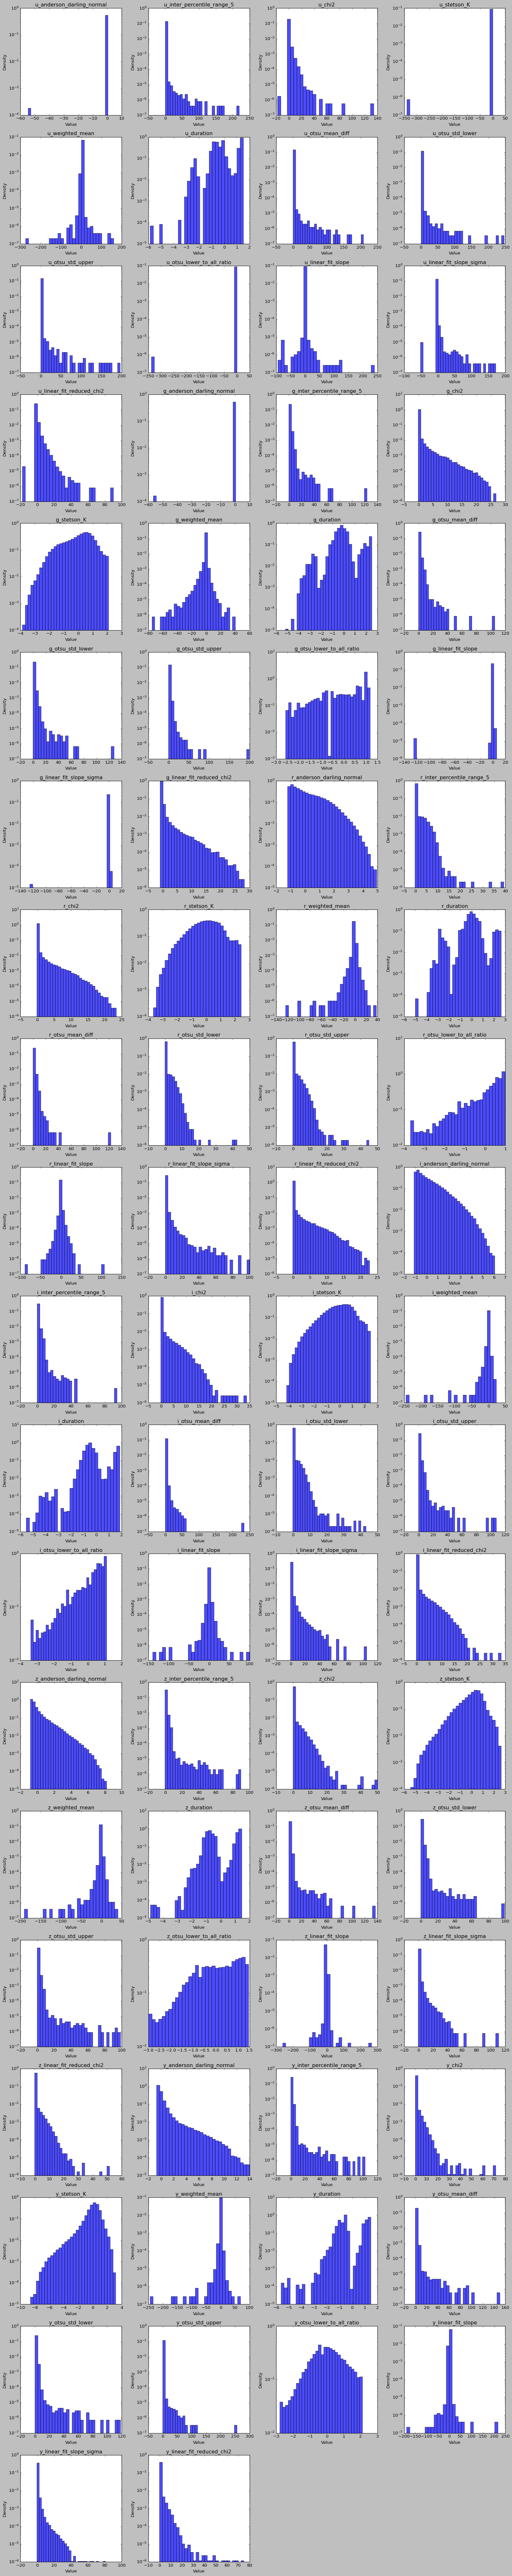

In [49]:
# Plot histograms for each column of the DataFrame
def plot_histograms(dataframe):
    num_columns = dataframe.shape[1]
    num_rows = int(np.ceil(num_columns / 4))  # 4 histograms per row
    fig, axes = plt.subplots(num_rows, 4, figsize=(20, 5 * num_rows))

    for i, column in enumerate(dataframe.columns):
        row, col = divmod(i, 4)
        ax = axes[row, col] if num_rows > 1 else axes[col]
        ax.hist(dataframe[column], bins=30, density=True, color='blue', alpha=0.7)
        ax.set_title(column)
        ax.set_xlabel('Value')
        ax.set_ylabel('Density')
        ax.set_yscale('log')
    
    # Remove empty subplots
    for j in range(i + 1, num_rows * 4):
        row, col = divmod(j, 4)
        fig.delaxes(axes[row, col] if num_rows > 1 else axes[col])
    
    plt.tight_layout()
    plt.show()

# Plot histograms
plot_histograms(df)

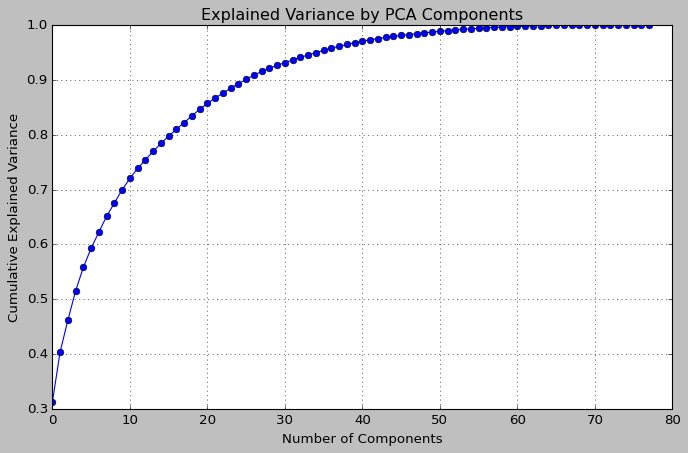

First few principal components:
[[-1.05098358 -0.08043024 -0.73333746 -0.95984965  1.89605548]
 [-1.20575798 -0.03710645 -0.18981679 -0.40011131  1.43498716]
 [-1.38422606 -0.0894698   1.16514285  0.73947308  1.2435791 ]
 ...
 [-1.07860916  0.05738034 -0.20199607 -0.32260764  0.93207273]
 [-1.09234149  0.07733461 -0.19339271  0.31073021 -2.51265399]
 [-1.43305678 -0.24688051  1.85351491  1.19881225  1.98562071]]


In [51]:
# Perform PCA
pca = PCA()
pca_result = pca.fit_transform(df)

# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Plot explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(explained_variance_ratio), marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by PCA Components')
plt.grid(True)
plt.show()

# Print the first few principal components
print("First few principal components:")
print(pca_result[:, :5])  # Displaying the first 5 principal components for brevity

Text(0.5, 1.0, 'First Two Principal Components')

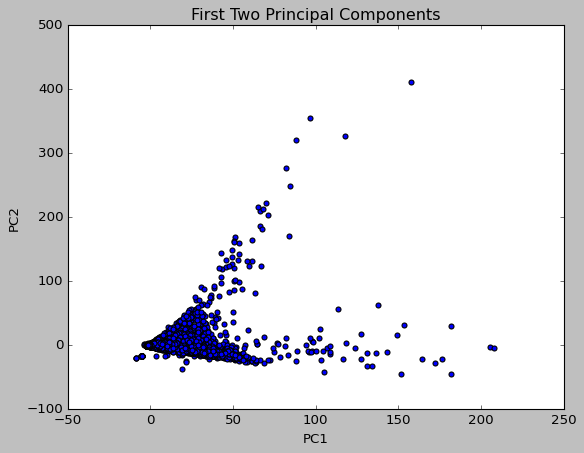

In [52]:
pca = PCA(n_components=2).fit_transform(df)
plt.scatter(pca[:, 0], pca[:, 1])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('First Two Principal Components')

In [54]:
def pca_plotter(eigenvalues,cumulative_variance,knee_criteria,xlim=[-1, 40],ylim=[0,1250],ylim2=[50, 100], face = True,c1='k',c2='k', sizefont = 15):
    # Create subplots
    fig, ax1 = plt.subplots(figsize=(8.5,5))
    # Plot the scree plot
    bar = ax1.bar(range(len(eigenvalues)), eigenvalues, alpha=1, color = c1,label = 'Abs. Individual Variance')
    ax1.set_xlabel(r'Principal Component')
    ax1.set_ylabel(r'Eigenvalue')
    ax1.yaxis.label.set_color(c1)
    ax1.tick_params(axis='y', colors=c1)
    ax1.set_ylim(ylim)
    ax1.set_xlim(xlim)
    ax1.set_xticks(range(-1,len(eigenvalues),5))
    ax1.set_xticklabels([i+1 for i in range(-1,len(eigenvalues),5)])
    ax1.minorticks_on()
    ax1.tick_params(which='both', direction='in', top=True, right=True)
    # Create a twin y-axis for the cumulative variance plot
    ax2 = ax1.twinx()
    ax2.minorticks_on()
    # Plot the cumulative variance plot
    cum = ax2.plot(cumulative_variance, c=c2, linestyle='-', marker='.', markersize=12,label = 'Relative Cumulative Variance')
    if face:
        ax2.fill_between(range(len(cumulative_variance)),cumulative_variance, color=c2, alpha=0.15)
    ax2.set_ylabel('Cumulative Variance [%]')
    ax2.yaxis.label.set_color(c2)
    ax2.tick_params(axis='y', colors=c2)
    ax2.set_ylim(ylim2)
    ax2.tick_params(which='both', direction='in', top=True, right=True)
    # Plot Knee
    knee_point = np.argmax(np.diff(cumulative_variance) <= knee_criteria)
    variance = cumulative_variance[knee_point-1]
    print('Knee Point: ', knee_point)
    print('Variance: ', variance)
    line = plt.axvline(x=knee_point-1, color='black',linestyle = '--',label = 'Knee Point')
    # Combine all labels in one legend
    handles, labels = ax1.get_legend_handles_labels()
    handles += cum
    labels += ['Rel. Cumulative Variance']
    handles += [line]
    labels += ['Knee Point']
    plt.legend(handles=handles, labels=labels, loc='lower right', frameon=False, fontsize = sizefont)
    plt.show()
    return

AttributeError: 'numpy.ndarray' object has no attribute 'explained_variance_ratio_'